# App Data Analysis

### 1. Free trials for an app are provided to the users for a month
### 2. We need to predict who among them gets enrolled to the app post the free trails

<img src="Business_Challenge.jpg">

# Import Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
%config IPCompleter.greedy=True

In [2]:
df = pd.read_csv('appdata10.csv')

In [3]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
df.first_open = pd.to_datetime(df.first_open)

In [5]:
df.hour = df.hour.str.split(':',expand=True)[0]

In [6]:
 df.enrolled_date = pd.to_datetime(df.enrolled_date)

In [7]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,01,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [8]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null datetime64[ns]
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null datetime64[ns]
liked                   50000 non-null int64
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 4.6+ MB


# Basic Feature creation

In [10]:
df['duration'] = df.enrolled_date - df.first_open

In [11]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,duration
0,235136,2012-12-27 02:14:51.273,3,02,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaT
1,333588,2012-12-02 01:16:00.905,6,01,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaT
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaT
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,00:03:03.159000
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,00:05:49.180000


In [12]:
df['duration'] = df['duration'].dt.seconds/60

In [13]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,duration
0,235136,2012-12-27 02:14:51.273,3,02,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,01,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,3.050000
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,5.816667


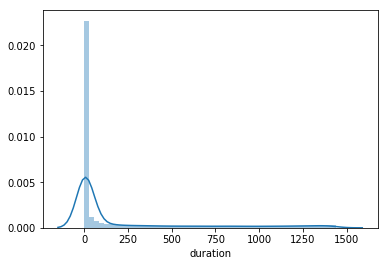

In [14]:
sns.distplot(df['duration'].dropna())

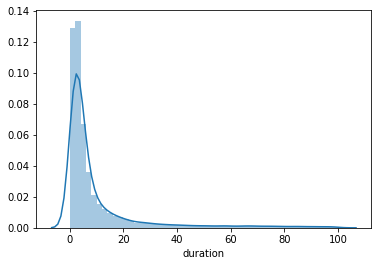

In [15]:
sns.distplot(df[df['duration']<100]['duration'])


In [16]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked,duration
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,31074.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000,212.460722
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184,393.514625
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,2.550000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000,6.966667
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,181.733333
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1439.983333


#### 1. Note that enrolled_date can be anytime post first_open.
#### 2. However it makes sense to have a cutoff duration post first_open.
#### 3. If user doesnt enrolled post the cut-off duration we mark enrolled as '0'
#### 4. With this change, the model predicts if a user gets enrolled within the cutoff duration

In [17]:
df.loc[df['duration']>50,'enrolled']=0

In [18]:
df.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,duration
0,235136,2012-12-27 02:14:51.273,3,02,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,01,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,3.050000
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,5.816667
5,56480,2013-04-03 09:58:15.752,2,09,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0,0.783333
6,144649,2012-12-25 02:33:18.461,1,02,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaT,0,NaN
7,249366,2012-12-11 03:07:49.875,1,03,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaT,0,NaN
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,0,2013-04-27 22:24:54.542,0,482.866667
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0,9.700000


# EDA and  Feature Engineering

In [19]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,duration
0,235136,2012-12-27 02:14:51.273,3,02,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,01,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,3.050000
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,5.816667


In [20]:
df['month']=df.first_open.dt.month
df['year']=df.first_open.dt.year
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,duration,month,year
0,235136,2012-12-27 02:14:51.273,3,02,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN,12,2012
1,333588,2012-12-02 01:16:00.905,6,01,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN,12,2012
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN,3,2013
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,3.050000,7,2013
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,5.816667,2,2013


In [21]:
cat_vars = ['minigame', 'used_premium_feature', 'liked','year']

In [22]:
def analyse_discrete(df, var, target):
    
    print('\n\n----------------------------------------------------------------------------------')
    print('   VARIABLE ANALYSIS : %s    ' %var)
    print('---------------------------------------------------------------------------------- \n')


    df = df.copy()
    
    temp=df.groupby(target)[var].value_counts().unstack(fill_value=0).stack().reset_index(name='count')
    
    fig = plt.figure(figsize=(15,20))
    ylim = (0, temp['count'].max()*1.2)

    # Setting the values for all axes.

    for num,c in enumerate(temp[target].unique(),1):

        df0=temp[temp[target]==c]
        no_cols = max(round(0.5+(temp[target].nunique()/5)),2)
        ax = fig.add_subplot(5,no_cols,num)
        plt.setp(ax,  ylim=ylim)

        df0.plot(x=var,y ='count', title=target+':'+str(c), ax=ax, legend=False,kind='bar')


        for index,data in enumerate(df0['count']):
            if data !=0:
                plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10),horizontalalignment='center')


    plt.tight_layout()
    plt.show()



----------------------------------------------------------------------------------
   VARIABLE ANALYSIS : minigame    
---------------------------------------------------------------------------------- 



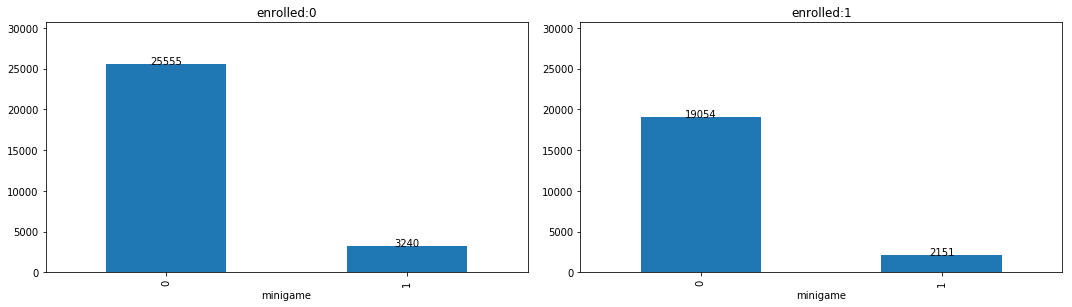



----------------------------------------------------------------------------------
   VARIABLE ANALYSIS : used_premium_feature    
---------------------------------------------------------------------------------- 



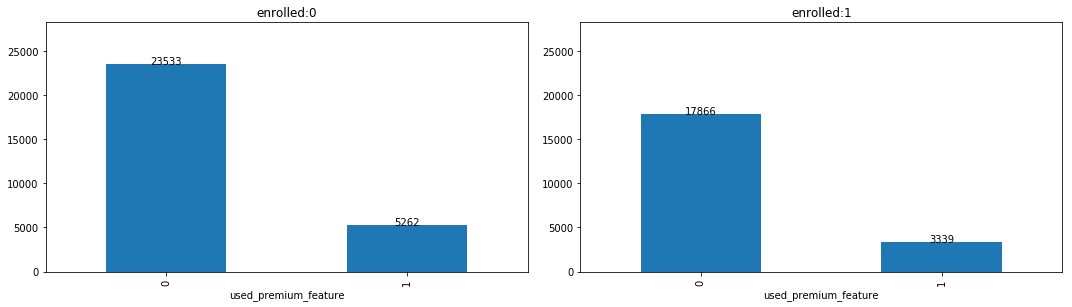



----------------------------------------------------------------------------------
   VARIABLE ANALYSIS : liked    
---------------------------------------------------------------------------------- 



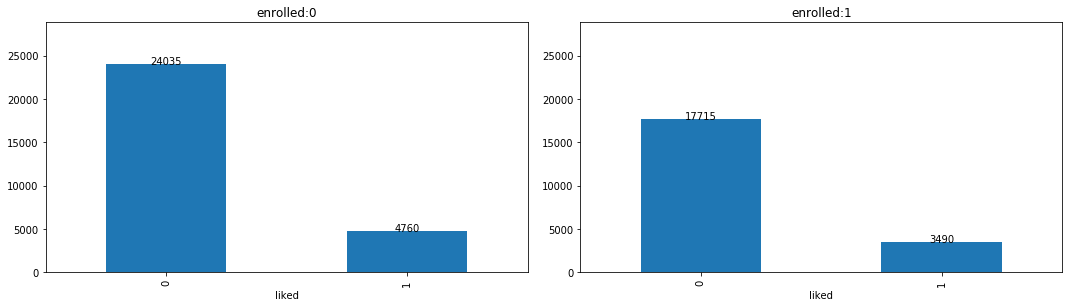



----------------------------------------------------------------------------------
   VARIABLE ANALYSIS : year    
---------------------------------------------------------------------------------- 



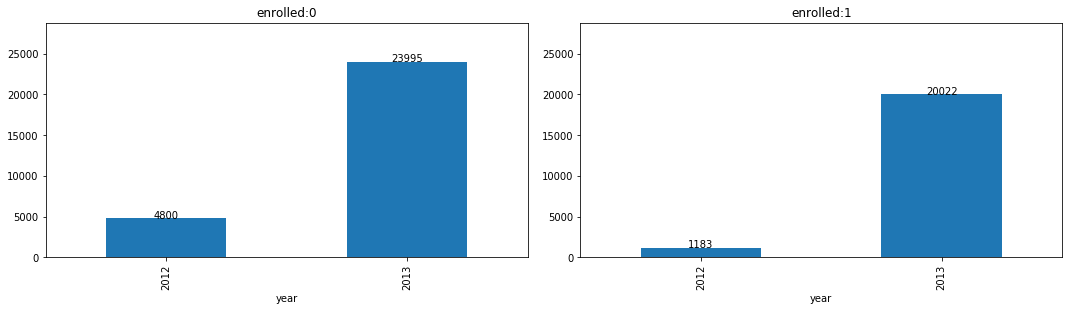

In [23]:
for var in cat_vars:
    analyse_discrete(df,var,'enrolled')

In [24]:
num_vars = ['dayofweek', 'hour', 'age',
       'numscreens', 'duration', 'month']

In [25]:
df[num_vars].dtypes

dayofweek       int64
hour           object
age             int64
numscreens      int64
duration      float64
month           int64
dtype: object

In [26]:
df.hour = df.hour.astype(int)
df[num_vars].dtypes

dayofweek       int64
hour            int64
age             int64
numscreens      int64
duration      float64
month           int64
dtype: object

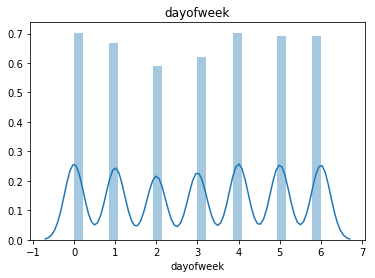

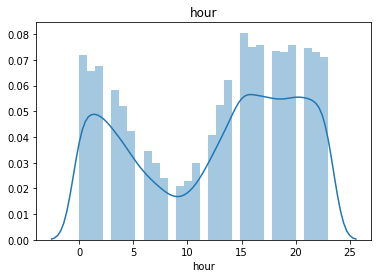

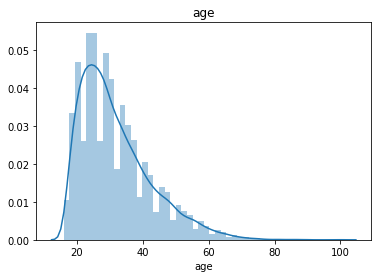

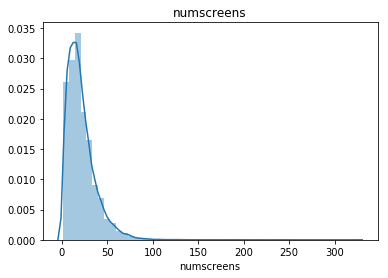

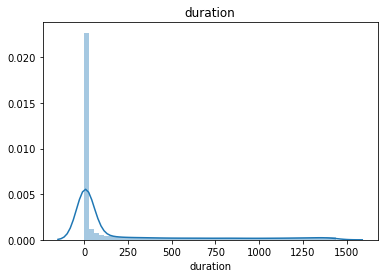

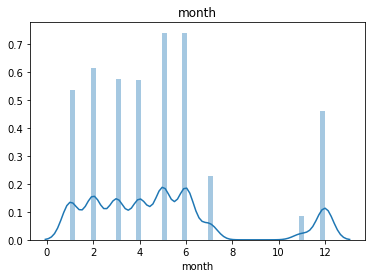

In [27]:
def analyse_continous(df, var):
    sns.distplot(df[var].dropna())
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in num_vars:
    analyse_continous(df, var)

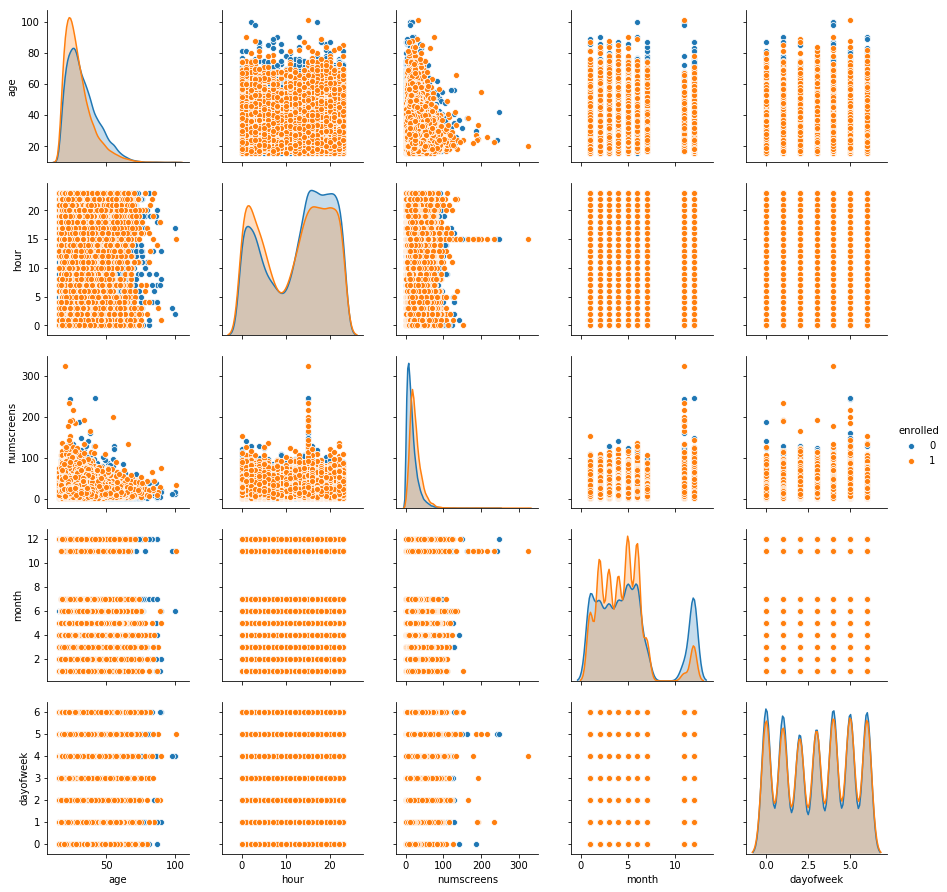

In [28]:
sns.pairplot(data=df, vars=['age','hour','numscreens','month','dayofweek'],hue='enrolled')



----------------------------------------------------------------------------------
   VARIABLE ANALYSIS : dayofweek    
---------------------------------------------------------------------------------- 



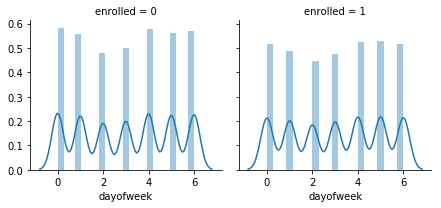



----------------------------------------------------------------------------------
   VARIABLE ANALYSIS : hour    
---------------------------------------------------------------------------------- 



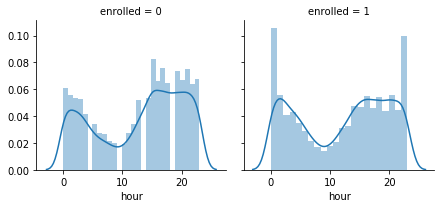



----------------------------------------------------------------------------------
   VARIABLE ANALYSIS : age    
---------------------------------------------------------------------------------- 



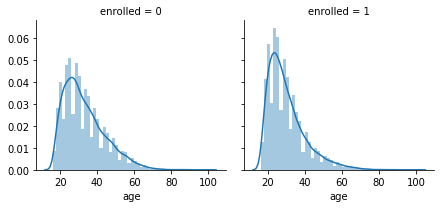



----------------------------------------------------------------------------------
   VARIABLE ANALYSIS : numscreens    
---------------------------------------------------------------------------------- 



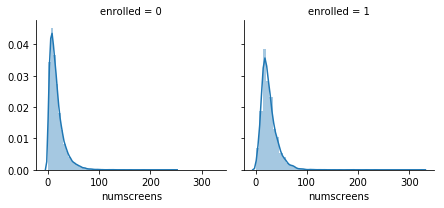



----------------------------------------------------------------------------------
   VARIABLE ANALYSIS : duration    
---------------------------------------------------------------------------------- 



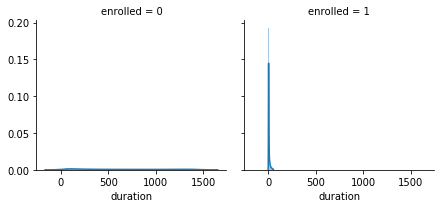



----------------------------------------------------------------------------------
   VARIABLE ANALYSIS : month    
---------------------------------------------------------------------------------- 



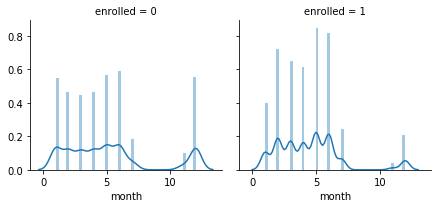

In [29]:
def analyse_continous_detailed(df, var, target):
    print('\n\n----------------------------------------------------------------------------------')
    print('   VARIABLE ANALYSIS : %s    ' %var)
    print('---------------------------------------------------------------------------------- \n')


    g = sns.FacetGrid(df, col=target,col_wrap=4)
    g.map(sns.distplot, var);
    #g.set(xscale="log")
    # Show plot
    plt.show()
    
for var in num_vars:
    analyse_continous_detailed(df, var,'enrolled')

# Split Screen List Variable

In [30]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,duration,month,year
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN,12,2012
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN,12,2012
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN,3,2013
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,3.050000,7,2013
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,5.816667,2,2013


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer()

In [33]:
X2 = cv.fit_transform(df['screen_list']).toarray()
X2 = pd.DataFrame(X2,columns=cv.get_feature_names())

In [34]:
X2

,about,accountview,addproperty,addvehicle,adverseactions,alerts,bankverification,boostfriendslist,bvplaidlinkcontainer,bvstats,camerascreen,cc1,cc1category,cc3,communityandinvites,contactinfoconfirm,credit1,credit2,credit3,credit3alerts,credit3container,credit3cta,credit3dashboard,credits,cycle,editprofile,employmentinfo,employmentsummary,finances,findfriendscycle,forgotpassword,groupedinstitutions,history,home,idandselfiecamerascreen,identityverification,idscreen,instantloanssn,instantoffercreateaccount,institutions,joinscreen,landingscreen,leaderboard,listpicker,llloanamount,loan,loan1,loan2,loan3,loan4,loanappagreement,loanappbankinfo,loanappconfirmwithdrawal,loanappdenied,loanappesign,loanapploan4,loanapppaymentschedule,loanapppromocode,loanappreasons,loanapprequestamount,loanappschedulecall,loanappsuccess,loanappverifybankinfo,loanappwithdrawn,location,login,loginform,managefinances,mlwebview,networkfailure,networkuser,newcontactlistinvite,payoff,product_review,product_review2,product_review3,product_review4,product_review5,profileannualincome,profilechildren,profilecompanyname,profileeducation,profileeducationmajor,profileemploymentlength,profilejobtitle,profilemaritalstatus,profilepage,profileproduct_review,profileverifyincometype,profileverifyssn,providerlist,referralcontainer,referrals,referralscreen,resendtoken,reviewcreditcard,rewarddetail,rewardjoinscreen,rewards,rewardscontainer,saving1,saving10,saving2,saving2amount,saving4,saving5,saving6,saving7,saving8,saving9,savinggoaledit,savinggoalincomesalary,savinggoalother,savinggoalpreview,scanpreview,securitymodal,selectinstitution,settings,signup,signupemail,signupname,splash,transactionlist,verifyannualincome,verifybankinfo,verifycountry,verifydateofbirth,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [35]:
X2.columns

Index(['about', 'accountview', 'addproperty', 'addvehicle', 'adverseactions',
       'alerts', 'bankverification', 'boostfriendslist',
       'bvplaidlinkcontainer', 'bvstats',
       ...
       'verifyhousing', 'verifyhousingamount', 'verifyincometype',
       'verifymobile', 'verifyphone', 'verifyssn', 'verifytoken', 'webview',
       'welcomebankverification', 'yournetwork'],
      dtype='object', length=137)

In [36]:
corr_data = X2.corr()

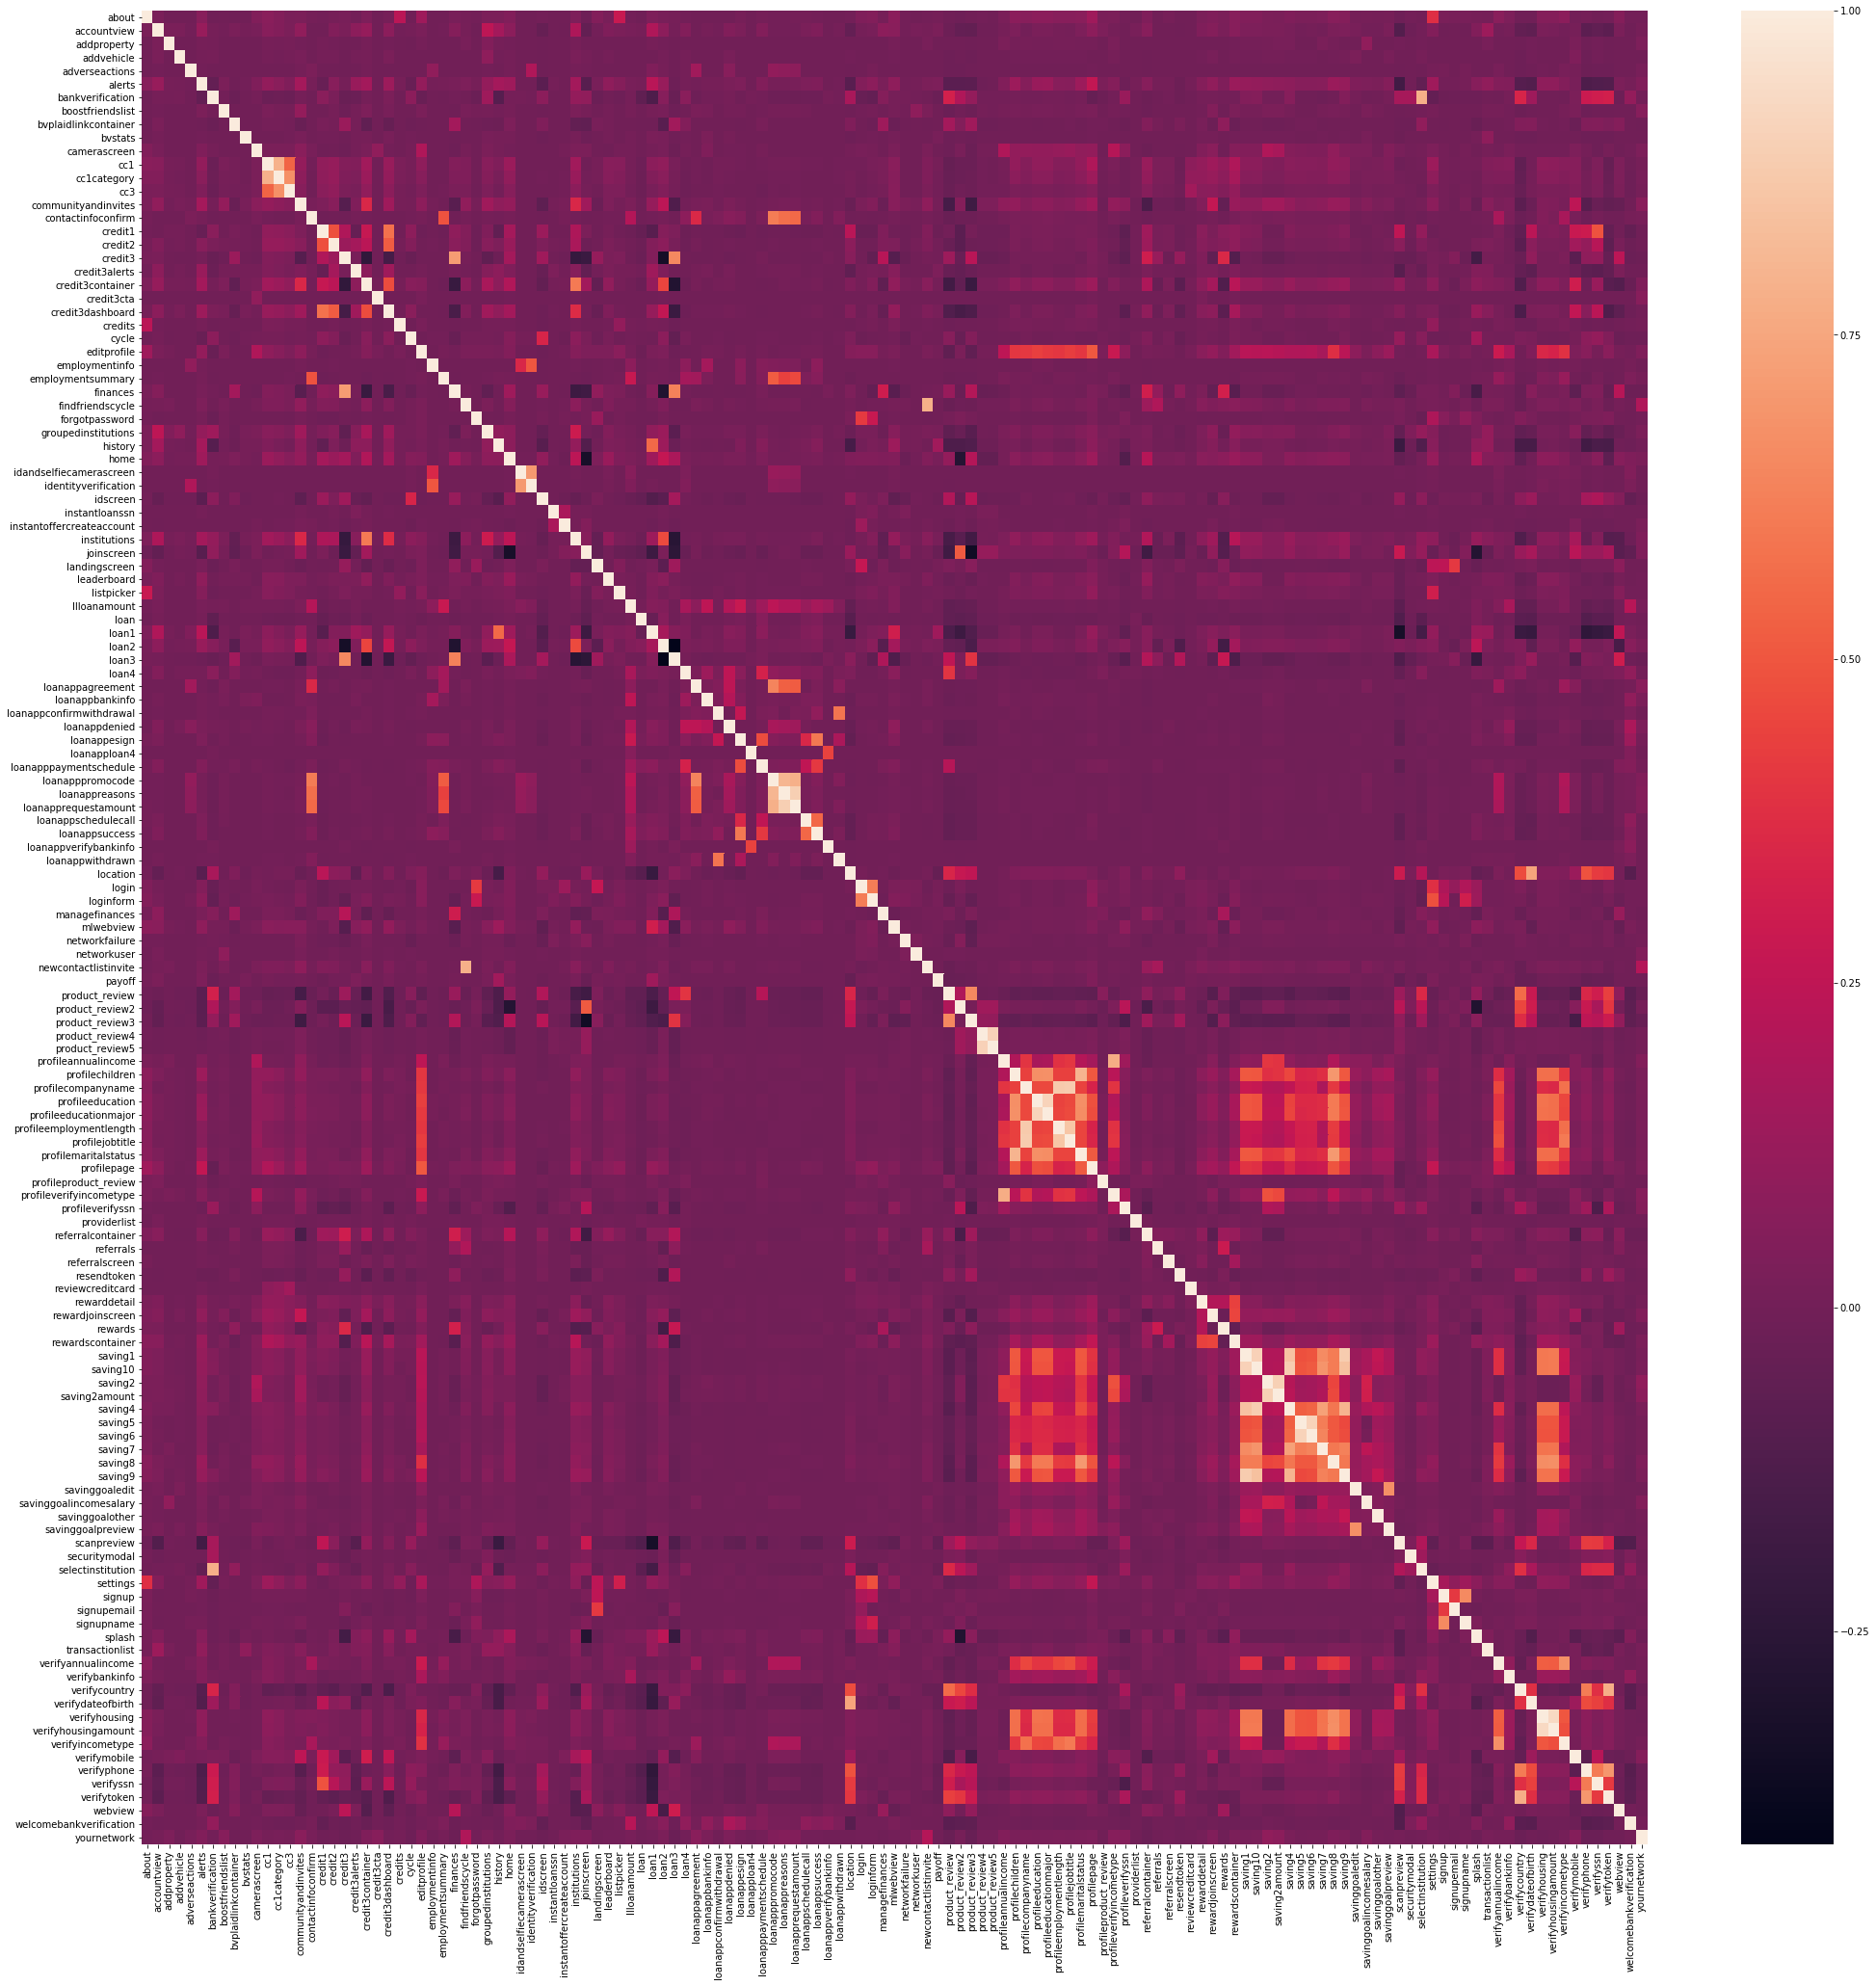

In [37]:
plt.figure(figsize=(35,35))
sns.heatmap(corr_data,annot=False)


#### From the heatmap, we see groups of highly correlated variables, we set a threshold of 0.8 and remove these variables

In [38]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(X2, 0.8)
len(set(corr_features))

12

In [40]:
corr_features

{'loanappreasons',
 'loanapprequestamount',
 'product_review5',
 'profileeducationmajor',
 'profileemploymentlength',
 'profilejobtitle',
 'saving10',
 'saving2amount',
 'saving4',
 'saving6',
 'saving9',
 'verifyhousingamount'}

In [41]:
X2.shape

(50000, 137)

In [42]:
X2.drop(labels=corr_features, axis=1, inplace=True)
X2.shape

(50000, 125)

In [43]:
df = pd.concat([df,X2],sort=False,axis=1)
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,duration,month,year,about,accountview,addproperty,addvehicle,adverseactions,alerts,bankverification,boostfriendslist,bvplaidlinkcontainer,bvstats,camerascreen,cc1,cc1category,cc3,communityandinvites,contactinfoconfirm,credit1,credit2,credit3,credit3alerts,credit3container,credit3cta,credit3dashboard,credits,cycle,editprofile,employmentinfo,employmentsummary,finances,findfriendscycle,forgotpassword,groupedinstitutions,history,home,idandselfiecamerascreen,identityverification,idscreen,instantloanssn,instantoffercreateaccount,institutions,joinscreen,landingscreen,leaderboard,listpicker,llloanamount,loan,loan1,loan2,loan3,loan4,loanappagreement,loanappbankinfo,loanappconfirmwithdrawal,loanappdenied,loanappesign,loanapploan4,loanapppaymentschedule,loanapppromocode,loanappschedulecall,loanappsuccess,loanappverifybankinfo,loanappwithdrawn,location,login,loginform,managefinances,mlwebview,networkfailure,networkuser,newcontactlistinvite,payoff,product_review,product_review2,product_review3,product_review4,profileannualincome,profilechildren,profilecompanyname,profileeducation,profilemaritalstatus,profilepage,profileproduct_review,profileverifyincometype,profileverifyssn,providerlist,referralcontainer,referrals,referralscreen,resendtoken,reviewcreditcard,rewarddetail,rewardjoinscreen,rewards,rewardscontainer,saving1,saving2,saving5,saving7,saving8,savinggoaledit,savinggoalincomesalary,savinggoalother,savinggoalpreview,scanpreview,securitymodal,selectinstitution,settings,signup,signupemail,signupname,splash,transactionlist,verifyannualincome,verifybankinfo,verifycountry,verifydateofbirth,verifyhousing,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN,12,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN,12,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN,3,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,3.050000,7,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,5.816667,2,2013,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0


# Train Test Split

In [44]:
# for the model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce



In [45]:
features_to_keep = df.columns

In [46]:
features_to_keep  = features_to_keep.drop(['user','first_open','screen_list','enrolled','enrolled_date','duration'])

In [47]:
features_to_keep

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked', 'month', 'year', 'about',
       ...
       'verifydateofbirth', 'verifyhousing', 'verifyincometype',
       'verifymobile', 'verifyphone', 'verifyssn', 'verifytoken', 'webview',
       'welcomebankverification', 'yournetwork'],
      dtype='object', length=134)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(df[features_to_keep],df['enrolled'],test_size=0.2, random_state=0)

# Basic Pipeline

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [50]:
pipeline = Pipeline([
     ('standard_scale',StandardScaler())
])

In [51]:
X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)

In [52]:
model = LogisticRegression(random_state = 0, penalty = 'l1')
model.fit(X_train,y_train)

/Users/bharath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8961

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5780
           1       0.87      0.89      0.88      4220

    accuracy                           0.90     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.90      0.90      0.90     10000



In [55]:
confusion_matrix(y_test,y_pred)

array([[5222,  558],
       [ 481, 3739]])

In [56]:
y_pred2 = model.predict(X_train)
accuracy_score(y_pred2,y_train)

0.900425

In [57]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print("L1 Classifier Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

/Users/bharath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bharath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bharath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bharath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bharath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

L1 Classifier Accuracy: 0.900 (+/- 0.009)


In [58]:
accuracies

array([0.90152462, 0.89952512, 0.89802549, 0.90027493, 0.89377656,
       0.90372593, 0.90672668, 0.89122281, 0.90222556, 0.90422606])

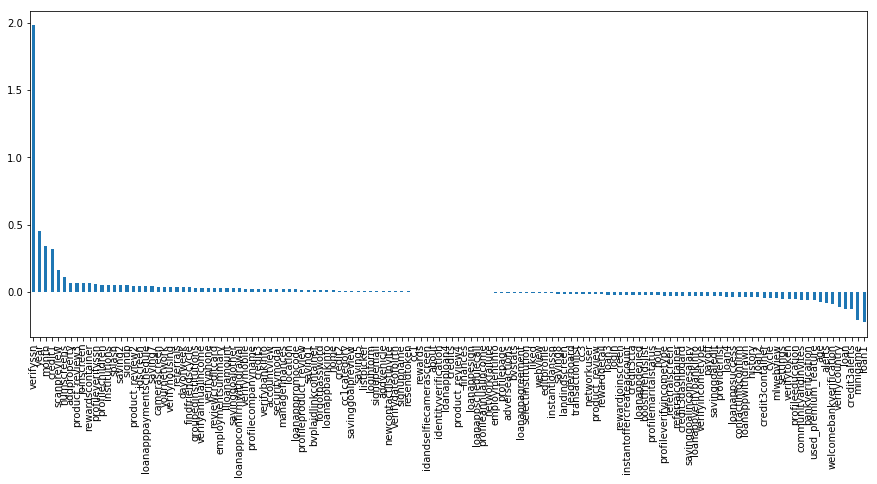

In [59]:
ser = pd.Series(model.coef_[0])
ser.index = features_to_keep
ser = ser.sort_values(ascending=False)
ser.plot.bar(figsize=(15,6))

In [60]:
pd.to_pickle(df,'dataframe')

In [61]:
df = pd.read_pickle('dataframe')

# Feature Selection

## Check and remove duplicate features

In [62]:
X_train,X_test,y_train,y_test = train_test_split(df[features_to_keep],df['enrolled'],test_size=0.2, random_state=0)

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            print (f'Duplicated Feature : {col_1} & {col_2}')
            
len(duplicated_feat)

0
10
20
30
40
Duplicated Feature : idandselfiecamerascreen & identityverification
50
60
70
80
90
100
110
120
130


1

In [63]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)
features_to_keep  = features_to_keep.drop(duplicated_feat)

X_train.shape, X_test.shape


((40000, 133), (10000, 133))

In [64]:
from sklearn.feature_selection import SelectFromModel

In [65]:
X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)

sel_ = SelectFromModel(LogisticRegression(C=100))
sel_.fit(X_train, y_train)

/Users/bharath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=100, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [66]:
selected_feat = features_to_keep[(sel_.get_support())]
len(selected_feat)

22

In [67]:
selected_feat

Index(['age', 'numscreens', 'minigame', 'used_premium_feature', 'month',
       'year', 'addproperty', 'alerts', 'bankverification',
       'communityandinvites', 'credit1', 'credit3alerts', 'joinscreen', 'loan',
       'loan1', 'product_review3', 'profileeducation', 'rewardscontainer',
       'scanpreview', 'verifycountry', 'verifyssn', 'welcomebankverification'],
      dtype='object')

# Final Model

In [68]:
X_train,X_test,y_train,y_test = train_test_split(df[selected_feat],df['enrolled'],test_size=0.2, random_state=0)

X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)

model = LogisticRegression(random_state = 0, penalty = 'l1')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

/Users/bharath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8963

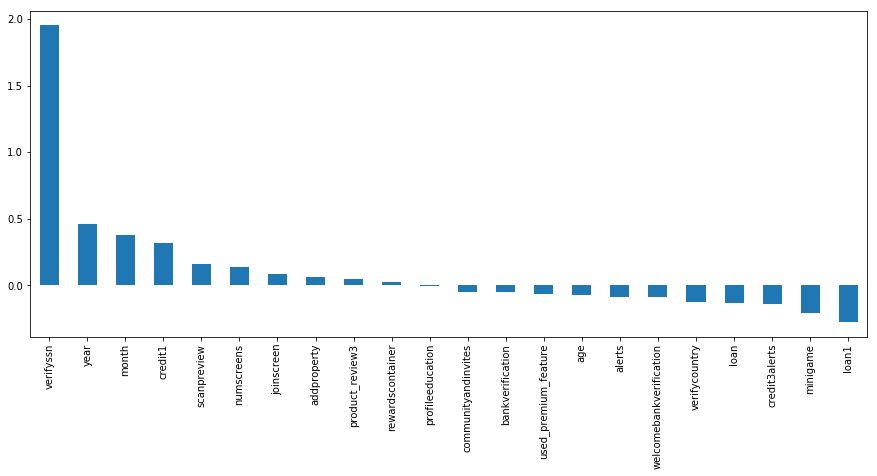

In [69]:
ser = pd.Series(model.coef_[0])
ser.index = selected_feat
ser = ser.sort_values(ascending=False)
ser.plot.bar(figsize=(15,6))

## Possible Data Leak with verifyssn?

In [71]:

accuracy_score(df['verifyssn'],df['enrolled'])

0.89966